# Imports and Data Upload

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
finals = pd.read_csv("data/final_exam.csv")
longexam = pd.read_csv("data/long_exam.csv")
longquiz = pd.read_csv("data/long_quiz.csv")
absences = pd.read_csv("data/absences.csv")

# Preprocessing Data

## Final Exams

In [7]:
finals = finals[['percent']]

In [8]:
finals.head()

,percent
0,92.50
1,77.50
2,42.50
3,43.75
4,57.50


## Long Exams

In [9]:
longexam['firstperc'] = longexam['first']/longexam['firstmax']
longexam['secondperc'] = longexam['second']/longexam['secondmax']
longexam['thirdperc'] = longexam['third']/longexam['thirdmax']
longexam['true_ave'] = (longexam['firstperc'] + longexam['secondperc'] + longexam['thirdperc'])*100/3

In [10]:
longexam = longexam[['firstperc', 'secondperc', 'thirdperc', 'true_ave']]

In [11]:
longexam.head()

,firstperc,secondperc,thirdperc,true_ave
0,0.92,0.600,0.84,78.666667
1,0.54,0.725,0.52,59.500000
2,0.46,0.625,0.56,54.833333
3,0.62,0.275,0.58,49.166667
4,0.44,0.375,0.30,37.166667


## Long Quizzes

In [12]:
longquiz['firstperc'] = longquiz['first ']/longquiz['firstmax']
longquiz['secondperc'] = longquiz['second']/longquiz['secondmax']
longquiz['thirdperc'] = longquiz['third']/longquiz['thirdmax']
longquiz['fourthperc'] = longquiz['fourth']/longquiz['fourthmax']
longquiz['true_ave'] = (longquiz.firstperc + longquiz.secondperc + longquiz.thirdperc + longquiz.fourthperc)*100/4

In [13]:
longquiz = longquiz[['firstperc', 'secondperc', 'thirdperc', 'fourthperc', 'true_ave']]

In [14]:
longquiz.head()

,firstperc,secondperc,thirdperc,fourthperc,true_ave
0,0.725,0.700,0.600,0.775,70.000
1,0.725,0.650,0.500,0.675,63.750
2,0.600,0.575,0.450,0.450,51.875
3,0.550,0.550,0.275,0.575,48.750
4,0.575,0.550,0.275,0.500,47.500


## Absences

In [15]:
absences.head()

,absences
0,4
1,1
2,4
3,4
4,0


# Correlation Function

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [52]:
def corrplot(x, y):
    x, y = np.array(x), np.array(y)
    x = x.reshape((-1, 1))
    model = LinearRegression()
    model.fit(x, y)
    print('Coefficient of Determination: ', model.score(x, y))
    print('Intercept: ', model.intercept_)
    print('Slope: ', model.coef_, '\n\n')
    return model.intercept_, model.coef_

# Data Visualization

## Long Quiz Scores and Long Exam Scores

In [66]:
ax_1, ax_2, ax_3 = [i*100 for i in longquiz.firstperc.tolist()], [i*100 for i in longquiz.secondperc.tolist()], [i*100 for i in longquiz.thirdperc.tolist()]
ay1, ay2, ay3 = [i*100 for i in longexam.firstperc.tolist()], [i*100 for i in longexam.secondperc.tolist()], [i*100 for i in longexam.thirdperc.tolist()]

Coefficient of Determination:  0.45946386836697894
Intercept:  5.279887482419134
Slope:  [0.84078762] 


Coefficient of Determination:  0.45111110302591484
Intercept:  11.932835820895512
Slope:  [0.83097015] 


Coefficient of Determination:  0.3165158616115017
Intercept:  29.3604436229205
Slope:  [0.83548983] 




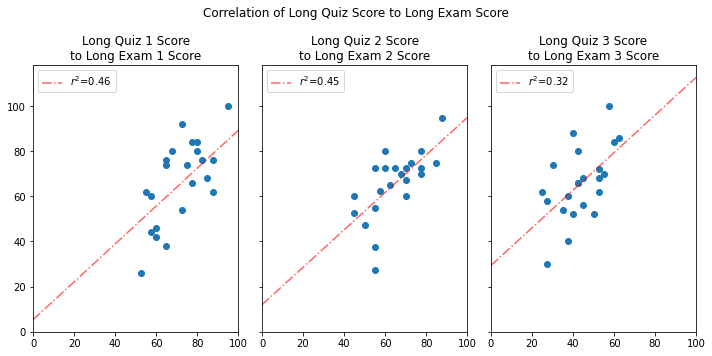

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10,5))

ax1.scatter(ax_1, ay1)

intercept, coef = corrplot(ax_1, ay2)
x = np.linspace(0, 100)
y = coef*x + intercept
ax1.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.46')

ax1.legend(loc='upper left')
ax1.set_title('Long Quiz 1 Score\nto Long Exam 1 Score')
ax1.set_xlim(0, 100)

ax2.scatter(ax_2, ay2)

intercept, coef = corrplot(ax_2, ay2)
x = np.linspace(0, 100)
y = coef*x + intercept
ax2.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.45')

ax2.legend(loc='upper left')
ax2.set_title('Long Quiz 2 Score\nto Long Exam 2 Score')
ax2.set_xlim(0, 100)

ax3.scatter(ax_3, ay3)

intercept, coef = corrplot(ax_3, ay3)
x = np.linspace(0, 100)
y = coef*x + intercept
ax3.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.32')

ax3.legend(loc='upper left')
ax3.set_title('Long Quiz 3 Score\nto Long Exam 3 Score')
ax3.set_xlim(0,100)


plt.suptitle('Correlation of Long Quiz Score to Long Exam Score')
plt.tight_layout()
# plt.subplots_adjust(wspace=10, hspace=1)

plt.savefig('figures/part_a.png')

## Average of Long Quiz Scores and Average Long Exam Scores

In [18]:
bx = longquiz.true_ave.tolist()
by = longexam.true_ave.tolist()

Coefficient of Determination:  0.7129747427632454
Intercept:  -5.4479310983842595
Slope:  [1.17870004] 




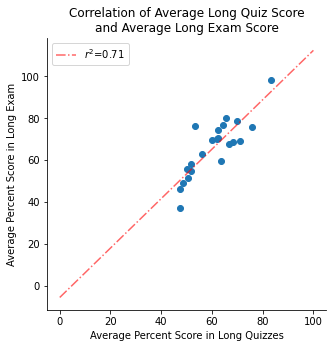

In [74]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(bx, by)
plt.ylabel('Average Percent Score in Long Exam')
plt.xlabel('Average Percent Score in Long Quizzes')
plt.title('Correlation of Average Long Quiz Score\nand Average Long Exam Score')

intercept, coef = corrplot(bx, by)
x = np.linspace(0, 100)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.71')

ax.legend(loc='upper left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('figures/part_b.png')

## Average of Long Quiz Scores and Final Exam Scores

In [41]:
cx = longquiz.true_ave.tolist()
cy = finals.percent.tolist()

Coefficient of Determination:  0.7167536708592357
Intercept:  -34.43612613725615
Slope:  [1.61751132] 




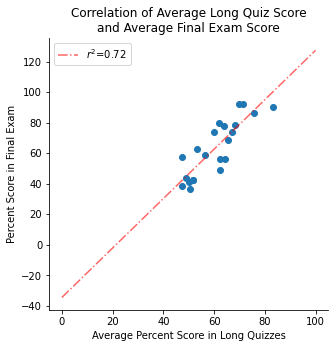

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(cx, cy)
intercept, coef = corrplot(cx, cy)
x = np.linspace(0, 100)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.72')
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Average Percent Score in Long Quizzes')
plt.title('Correlation of Average Long Quiz Score\nand Average Final Exam Score')

plt.legend(loc='upper left')
plt.savefig('figures/part_c.png')

## Average of Long Exam Scores and Final Exam

In [46]:
dx = longexam.true_ave.tolist()
dy = finals.percent.tolist()

Coefficient of Determination:  0.42536549291303627
Intercept:  4.685467294279171
Slope:  [0.8926419] 




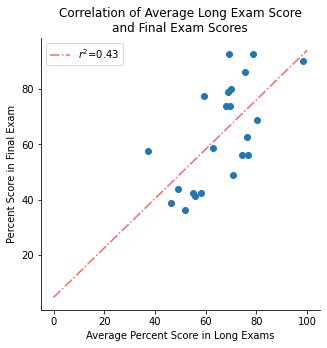

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(dx, dy)

intercept, coef = corrplot(dx, dy)
x = np.linspace(0, 100)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.43')

plt.legend(loc='upper left')
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Average Percent Score in Long Exams')
plt.title('Correlation of Average Long Exam Score\nand Final Exam Scores')


plt.savefig('figures/part_d.png')

## Student Absences and Long Quiz Scores

In [49]:
ex = absences.absences.tolist()
ey1, ey2, ey3, ey4 = [i*100 for i in longquiz.firstperc.tolist()], [i*100 for i in longquiz.secondperc.tolist()], [i*100 for i in longquiz.thirdperc.tolist()], [i*100 for i in longquiz.fourthperc.tolist()]

Coefficient of Determination:  0.21016158346659508
Intercept:  63.51883561643835
Slope:  [3.46318493] 


Coefficient of Determination:  0.060173021876916755
Intercept:  60.1541095890411
Slope:  [1.85787671] 


Coefficient of Determination:  0.04709101929455839
Intercept:  40.14554794520548
Slope:  [1.47688356] 


Coefficient of Determination:  0.11584236894331745
Intercept:  55.93321917808219
Slope:  [2.77825342] 




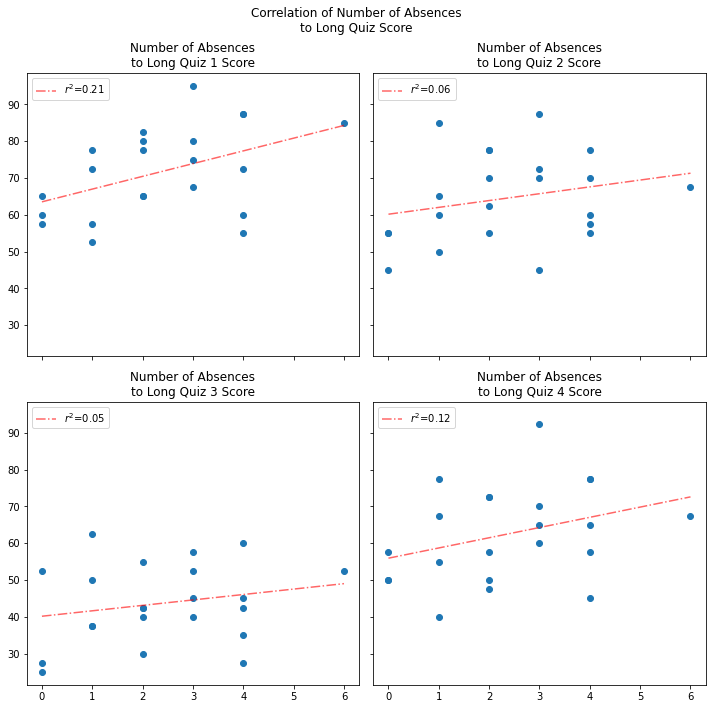

In [82]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10), sharex=True)

axes[0][0].scatter(ex, ey1)

intercept, coef = corrplot(ex, ey1)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[0][0].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.21')

axes[0][0].legend(loc='upper left')
axes[0][0].set_title('Number of Absences\nto Long Quiz 1 Score')


axes[0][1].scatter(ex, ey2)

intercept, coef = corrplot(ex, ey2)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[0][1].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.06')

axes[0][1].legend(loc='upper left')
axes[0][1].set_title('Number of Absences\nto Long Quiz 2 Score')


axes[1][0].scatter(ex, ey3)

intercept, coef = corrplot(ex, ey3)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[1][0].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.05')

axes[1][0].legend(loc='upper left')
axes[1][0].set_title('Number of Absences\nto Long Quiz 3 Score')


axes[1][1].scatter(ex, ey4)

intercept, coef = corrplot(ex, ey4)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[1][1].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.12')

axes[1][1].legend(loc='upper left')
axes[1][1].set_title('Number of Absences\nto Long Quiz 4 Score')

plt.suptitle('Correlation of Number of Absences\nto Long Quiz Score')
plt.tight_layout()
plt.savefig('figures/part_e.png')

## Student Absences and Long Exam Scores

In [55]:
fx = absences.absences.tolist()
fy1, fy2, fy3 = [i*100 for i in longexam.firstperc.tolist()], [i*100 for i in longexam.secondperc.tolist()], [i*100 for i in longexam.thirdperc.tolist()]

Coefficient of Determination:  0.2299733235063397
Intercept:  53.2054794520548
Slope:  [5.64383562] 


Coefficient of Determination:  0.03491255634019763
Intercept:  61.429794520547944
Slope:  [1.75085616] 


Coefficient of Determination:  0.03298546369045541
Intercept:  61.47945205479452
Slope:  [1.83561644] 




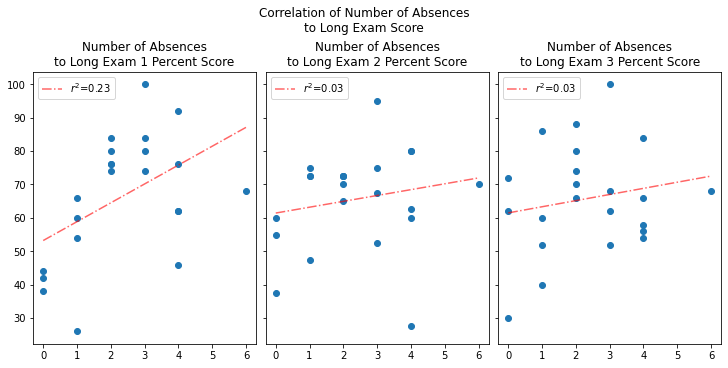

In [83]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10,5), constrained_layout=True)

axes[0].scatter(fx, fy1)

intercept, coef = corrplot(fx, fy1)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[0].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.23')

axes[0].legend(loc='upper left')
axes[0].set_title('Number of Absences\nto Long Exam 1 Percent Score')


axes[1].scatter(fx, fy2)

intercept, coef = corrplot(fx, fy2)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[1].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.03')

axes[1].legend(loc='upper left')
axes[1].set_title('Number of Absences\nto Long Exam 2 Percent Score')


axes[2].scatter(fx, fy3)

intercept, coef = corrplot(fx, fy3)
x = np.linspace(0, 6)
y = coef*x + intercept
axes[2].plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.03')

axes[2].legend(loc='upper left')
axes[2].set_title('Number of Absences\nto Long Exam 3 Percent Score')

plt.suptitle('Correlation of Number of Absences\nto Long Exam Score')

plt.savefig('figures/part_f.png')

## Student Absences and Average of Long Quiz Scores

In [57]:
gx = absences.absences.tolist()
gy = longquiz.true_ave.tolist()

Coefficient of Determination:  0.15123026683927177
Intercept:  54.93792808219178
Slope:  [2.39404966] 




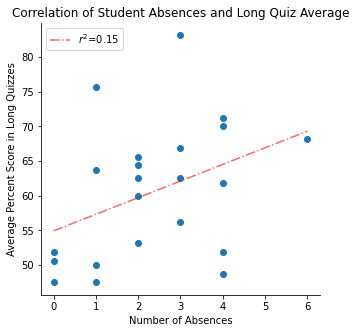

In [78]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(gx, gy)

intercept, coef = corrplot(gx, gy)
x = np.linspace(0, 6)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.15')

plt.legend(loc='upper left')
plt.ylabel('Average Percent Score in Long Quizzes')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Quiz Average')

plt.savefig('figures/part_g.png')

## Student Absences and Average of Long Exam Scores

In [60]:
hx = absences.absences.tolist()
hy = longexam.true_ave.tolist()

Coefficient of Determination:  0.1281828310524048
Intercept:  58.70490867579909
Slope:  [3.07676941] 




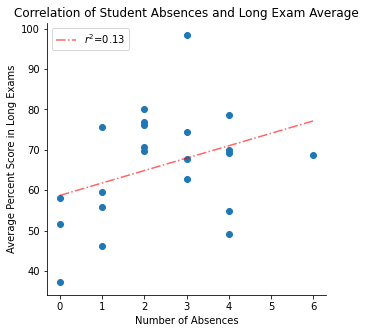

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(hx, hy)


intercept, coef = corrplot(hx, hy)
x = np.linspace(0, 6)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.13')

plt.legend(loc='upper left')
plt.ylabel('Average Percent Score in Long Exams')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Long Exam Average')

plt.savefig('figures/part_h.png')

## Student Absences and Final Exam Scores

In [63]:
ix = absences.absences.tolist()
iy = finals.percent.tolist()

Coefficient of Determination:  0.18884724622603177
Intercept:  51.49828767123287
Slope:  [5.11130137] 




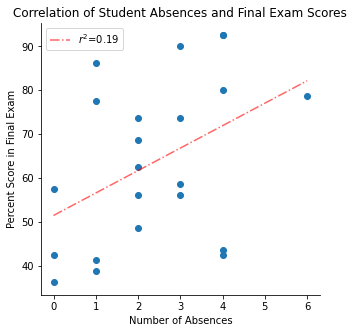

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(ix, iy)


intercept, coef = corrplot(ix, iy)
x = np.linspace(0, 6)
y = coef*x + intercept
plt.plot(x, y, color='red', linestyle='-.', alpha=0.6, label='$r^2$=0.19')

plt.legend(loc='upper left')
plt.ylabel('Percent Score in Final Exam')
plt.xlabel('Number of Absences')
plt.title('Correlation of Student Absences and Final Exam Scores')

plt.savefig('figures/part_i.png')